In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import KMeans

In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [9]:
pd.set_option("display.max_columns", None) #* -->Kolon gösterim sınırını kaldırdık

In [10]:
pd.set_option("display.width", 500) #* --> #* -->Genişlik ayarladık

In [11]:
df = pd.read_csv("D:\DataAnalysis\CustomerSegmentationClustering\Mall_Customers.csv") #* --> veri setini okuduk

In [13]:
def check_df(dataframe, head = 5):
    print("################### Shape ##################")
    print(dataframe.shape)
    print("################### Types ##################")
    print(dataframe.dtypes)
    print("################### Head ##################")
    print(dataframe.head(head))
    print("################### Tail ##################")
    print(dataframe.tail(head))
    print("################### NA ##################")
    print(dataframe.isnull().sum())
    print("################### Quantiles ##################")
    print(dataframe.describe([0, 0.05, 0.50, 0.75]).T)

In [14]:
check_df(df) #* -->Veri setine genel bir bakış

################### Shape ##################
(200, 5)
################### Types ##################
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
################### Head ##################
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
################### Tail ##################
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126              

In [15]:
def grab_col_names(dataframe, cat_th = 5, car_th = 10):
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int", "float"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car

In [16]:
cat_cols, num_cols, cat_but_car = grab_col_names(df) #* -->Sütunları kategorik, sayısal ve karmaşık kategorik olarak ayırır ve bu sütunları değişkenlere atar.

Observations: 200
Variables: 5
cat_cols: 1
num_cols: 0
cat_but_car: 0
num_but_cat: 0


In [17]:
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("--------------------------------------------------")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)

        Gender  Ratio
Gender               
Female     112   56.0
Male        88   44.0
--------------------------------------------------


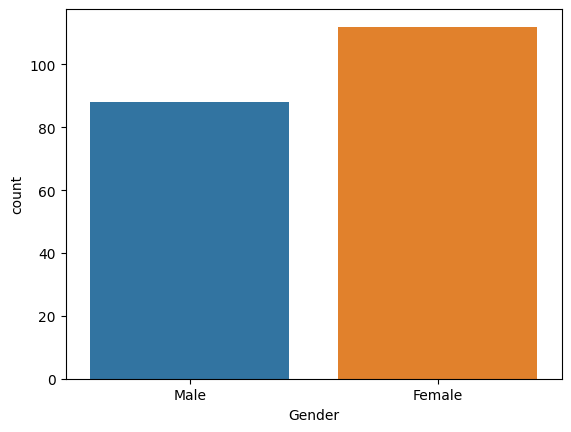

In [18]:
for col in cat_cols:
    cat_summary(df, col, plot = True)

In [19]:
def num_summary(dataframe, numerical_col, plot = False):
    print(dataframe[numerical_col].describe().T)
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block = True)

In [20]:
for col in num_cols:
    num_summary(df, col, plot = True)

In [21]:
df.describe().T
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

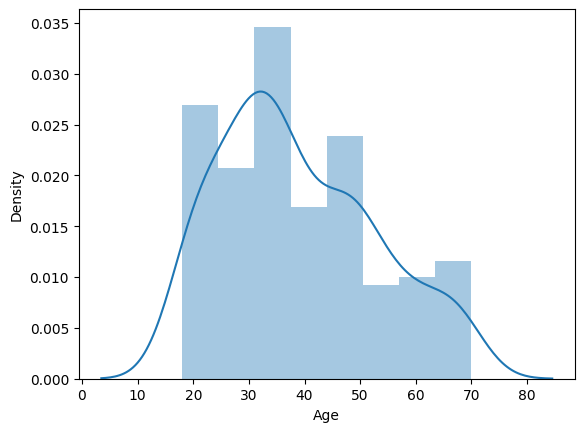

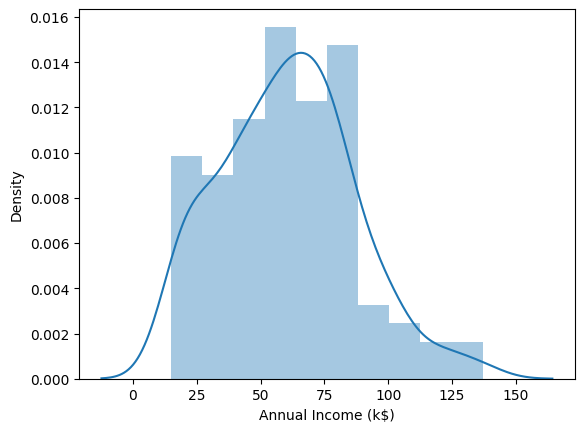

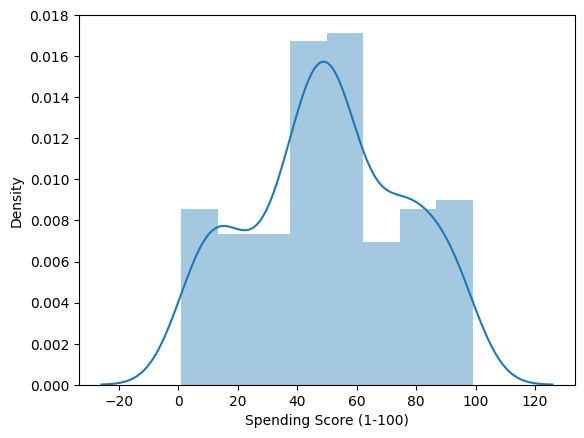

In [22]:
for col in columns:
    plt.figure()
    sns.distplot(df[col])

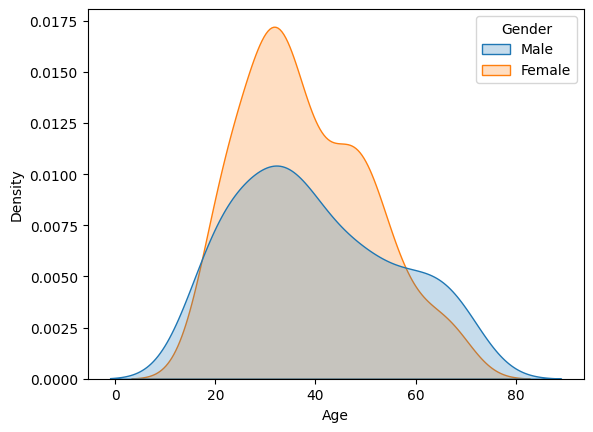

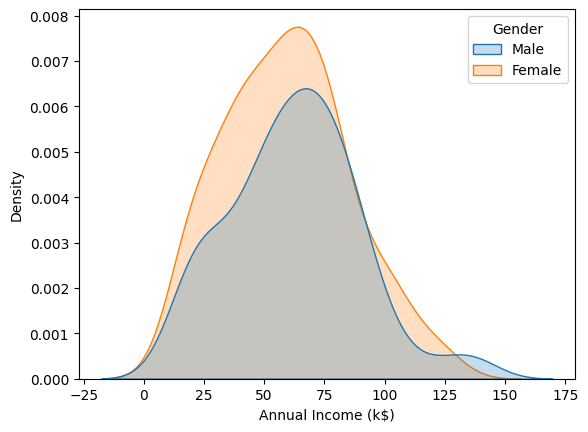

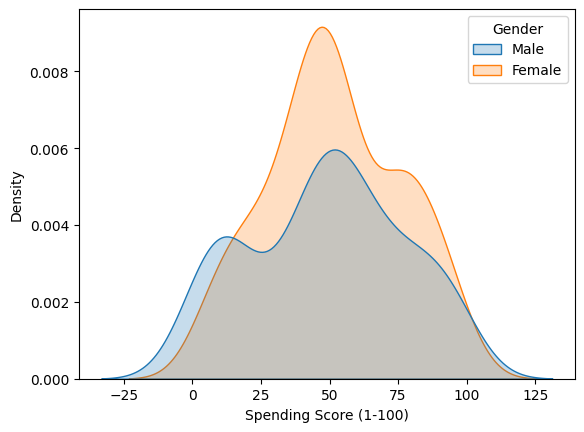

In [23]:
for col in columns:
    plt.figure()
    sns.kdeplot(data = df, x = col, hue = "Gender", shade = True)
    plt.show()

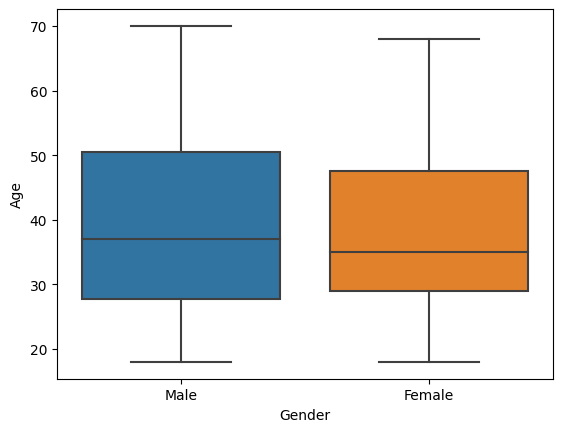

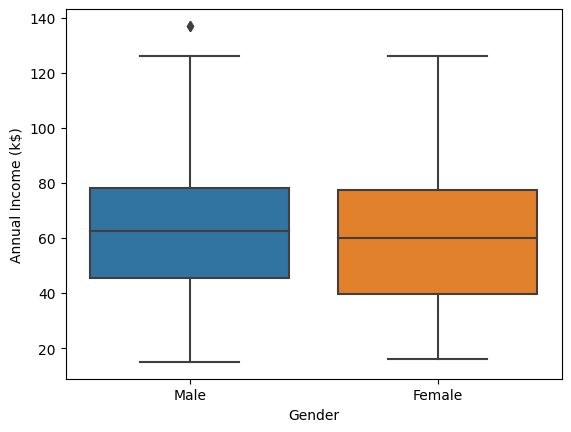

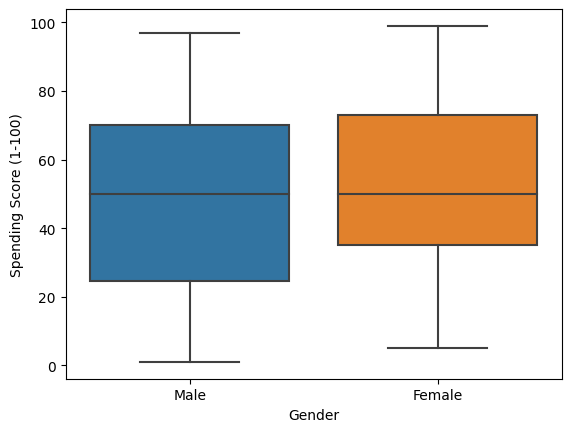

In [24]:
for col in columns:
    plt.figure()
    sns.boxplot(data = df, x = "Gender", y = df[col])

In [25]:
df["Gender"].value_counts(normalize = True) #* -->sütunuda bulunan değerlerin oranlarını gösterir.

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

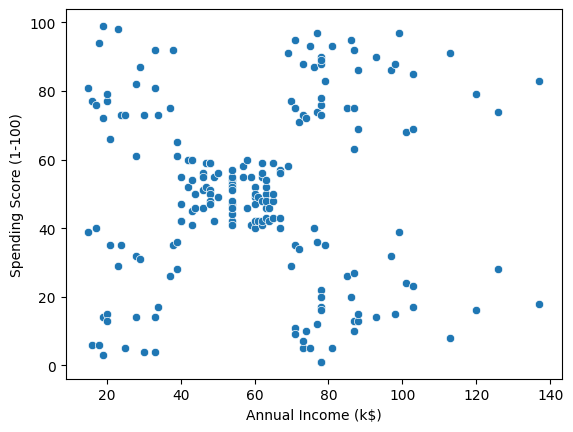

In [26]:
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)") #* -->Kolonlar arasındaki ilişkiyi scatterplot ile çizdik

In [27]:
df = df.drop("CustomerID", axis = 1)

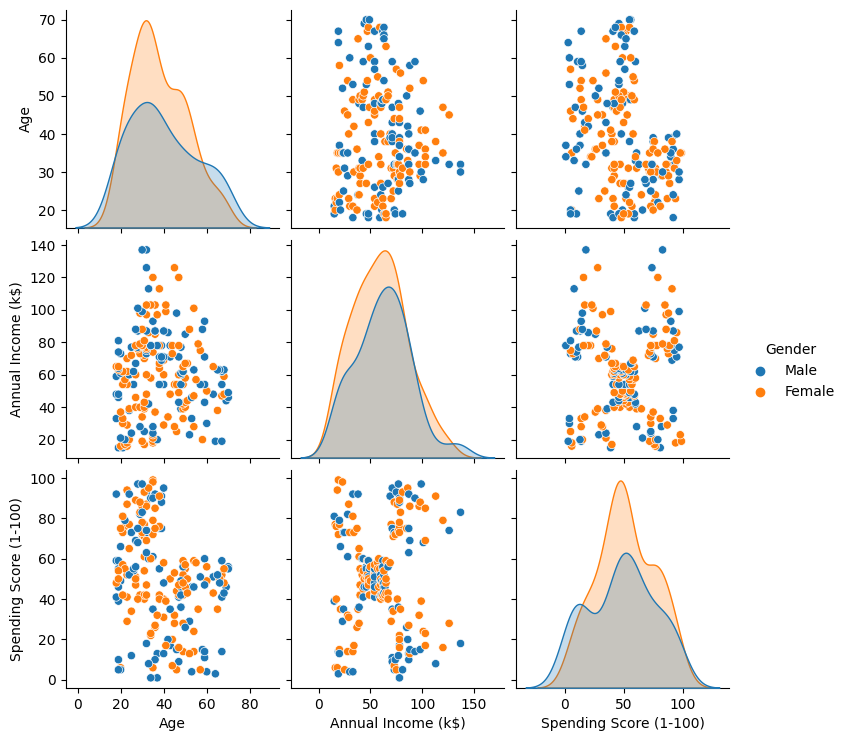

In [28]:
sns.pairplot(df, hue = "Gender")

In [29]:
df.groupby(["Gender"])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [30]:
numeric_columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

In [31]:
df_numeric = df[numeric_columns]

<Axes: >

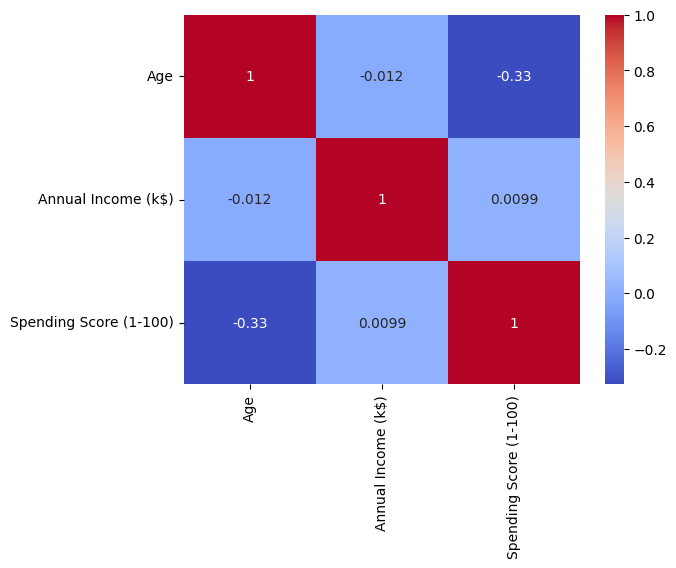

In [32]:
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")

In [33]:
clustering1 = KMeans(n_clusters = 3)

In [34]:
clustering1.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=3)

In [35]:
df["Income Cluster"] = clustering1.labels_

In [36]:
df["Income Cluster"].value_counts()

Income Cluster
0    90
1    74
2    36
Name: count, dtype: int64

In [37]:
clustering1.inertia_

23517.330930930933

In [38]:
inertia_score = []

In [39]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_score.append(kmeans.inertia_)

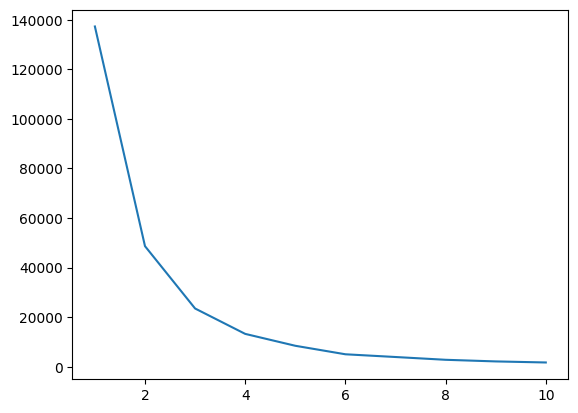

In [40]:
plt.plot(range(1, 11), inertia_score)

In [41]:
df.groupby("Income Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [42]:
clustering2 = KMeans(n_clusters = 5)

In [43]:
clustering2.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])

KMeans(n_clusters=5)

In [44]:
df["Spending and Income Cluster"] = clustering2.labels_

In [45]:
inertia_score2 = []

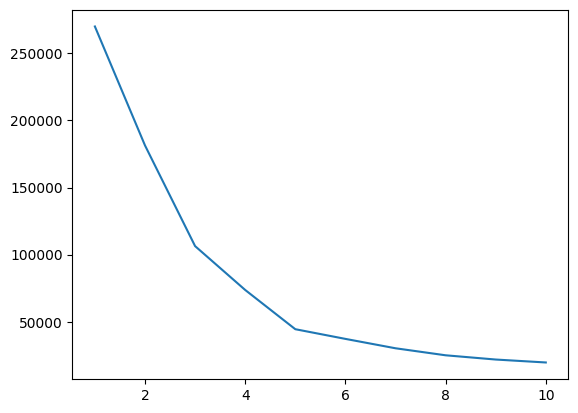

In [46]:
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
    inertia_score2.append(kmeans2.inertia_)

plt.plot(range(1, 11), inertia_score2)

In [47]:
centers = pd.DataFrame(clustering2.cluster_centers_)

In [48]:
centers.columns = ["x", "y"]

In [49]:
plt.figure(figsize = (10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

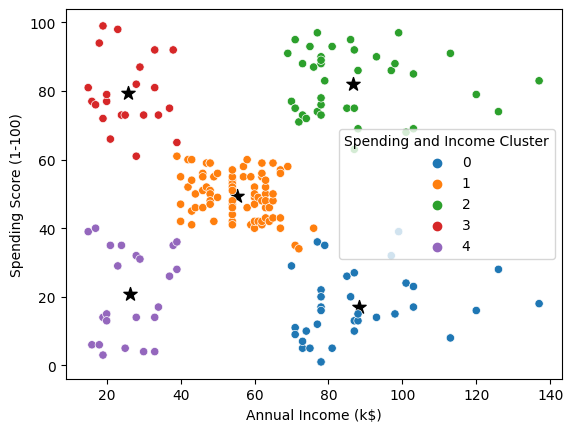

In [50]:
plt.scatter(x = centers["x"], y = centers["y"], s = 100, c = "black", marker = "*")
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Spending and Income Cluster", palette = "tab10")

In [51]:
plt.savefig("clustering_bivariate.png")

<Figure size 640x480 with 0 Axes>

In [52]:
pd.crosstab(df["Spending and Income Cluster"], df["Gender"], normalize = "index") #* -->"Spending and Income Cluster" ve "Gender" sütunları arasındaki ilişkiyi gösteren bir çapraz tablo oluşturur ve normalize eder.

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [53]:
df.groupby("Spending and Income Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scale = StandardScaler()

In [56]:
dff = pd.get_dummies(df, drop_first = True)

In [57]:
dff = dff[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Gender_Male"]]

In [58]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [59]:
inertia_score3 = []

In [60]:
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(dff)
    inertia_score3.append(kmeans3.inertia_)

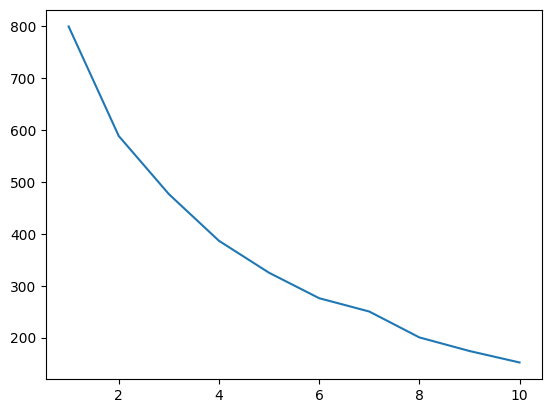

In [61]:
plt.plot(range(1, 11), inertia_score3)

In [62]:
df.to_csv("Clustering.csv")